In [1]:
import pvlib

In [2]:
latitude=37.983810 
longitude=23.727539
surface_tilt=0 
surface_azimuth=180
start=2018
end=2020

In [3]:
data, meta, inputs=pvlib.iotools.get_pvgis_hourly(latitude,
                                longitude, 
                                start,
                                end,
                                raddatabase="PVGIS-SARAH2", 
                                components=True, 
                                surface_tilt=surface_tilt, 
                                surface_azimuth=surface_azimuth, 
                                outputformat='csv', 
                                usehorizon=True, 
                                userhorizon=None, 
                                pvcalculation=True, 
                                peakpower=0.22, 
                                pvtechchoice='crystSi', 
                                mountingplace='free', 
                                loss=0, 
                                trackingtype=0, 
                                optimal_surface_tilt=False, 
                                optimalangles=False, 
                                url='https://re.jrc.ec.europa.eu/api/v5_2/',
                                map_variables=True, 
                                timeout=30
                                )

In [4]:
data.columns

Index(['P', 'poa_direct', 'poa_sky_diffuse', 'poa_ground_diffuse',
       'solar_elevation', 'temp_air', 'wind_speed', 'Int'],
      dtype='object')

In [5]:
data['poa_diffuse']=data['poa_sky_diffuse'] + data['poa_ground_diffuse']
data['poa_global']=data['poa_diffuse'] + data['poa_direct']
data

,P,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int,poa_diffuse,poa_global
time,,,,,,,,,,
2018-01-01 00:09:00+00:00,0.0,0.0,0.0,0.0,0.0,7.64,1.24,0,0.0,0.0
2018-01-01 01:09:00+00:00,0.0,0.0,0.0,0.0,0.0,8.32,1.17,0,0.0,0.0
2018-01-01 02:09:00+00:00,0.0,0.0,0.0,0.0,0.0,7.63,1.31,0,0.0,0.0
2018-01-01 03:09:00+00:00,0.0,0.0,0.0,0.0,0.0,7.10,1.38,0,0.0,0.0
2018-01-01 04:09:00+00:00,0.0,0.0,0.0,0.0,0.0,7.01,1.31,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:09:00+00:00,0.0,0.0,0.0,0.0,0.0,13.94,4.34,0,0.0,0.0
2020-12-31 20:09:00+00:00,0.0,0.0,0.0,0.0,0.0,13.82,4.07,0,0.0,0.0
2020-12-31 21:09:00+00:00,0.0,0.0,0.0,0.0,0.0,13.67,3.79,0,0.0,0.0


In [6]:
data.to_csv('pvgis_data.csv', index=True)

<Axes: xlabel='time'>

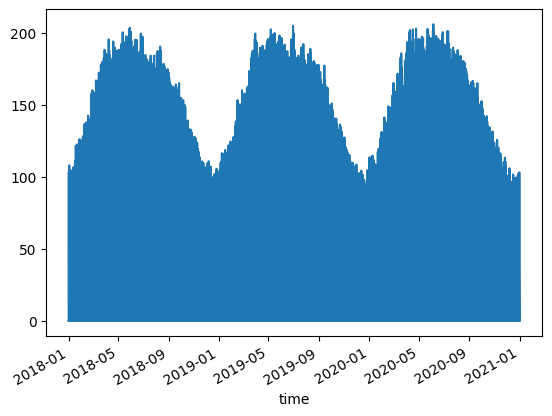

In [7]:
data['P'].plot()